<a href="https://colab.research.google.com/github/Prachisoni07/ml/blob/main/Movenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np

In [3]:
model_name = "movenet_lightning"
if "lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
else:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
movenet = module.signatures['serving_default']

KEYPOINT_EDGES = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 6),
    (5, 7), (7, 9), (6, 8), (8, 10), (5, 11), (6, 12), (11, 12),
    (11, 13), (13, 15), (12, 14), (14, 16)
]

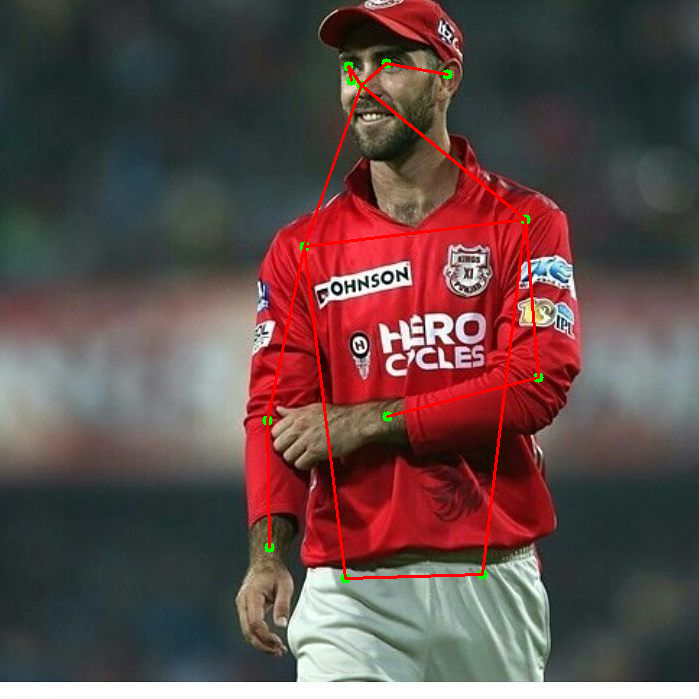

Image saved to output_image.jpg


In [4]:
image_path = "/content/maxwell.ml2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_resized = cv2.resize(image, (input_size, input_size))

image_resized = image_resized / 255.0
image_resized = (image_resized * 255).astype(np.uint8)
image_resized = tf.convert_to_tensor(image_resized, dtype=tf.int32)

image_resized = tf.expand_dims(image_resized, axis=0)

outputs = movenet(image_resized)
keypoints = outputs['output_0'].numpy()

height, width, _ = image.shape
keypoints_rescaled = keypoints[0] * [height, width, 1]

for keypoint in keypoints_rescaled[0]:
    y, x, confidence = keypoint
    if confidence > 0.3:
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)

for edge in KEYPOINT_EDGES:
    y1, x1, confidence1 = keypoints_rescaled[0][edge[0]]
    y2, x2, confidence2 = keypoints_rescaled[0][edge[1]]
    if confidence1 > 0.3 and confidence2 > 0.3:
        cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

from google.colab.patches import cv2_imshow
cv2_imshow(image)

output_path = "output_image.jpg"
cv2.imwrite(output_path, image)
print(f"Image saved to {output_path}")

# MoveNet: Real-Time Pose Estimation

## What is MoveNet?
MoveNet is a cutting-edge, lightweight human pose estimation model developed by Google, available on TensorFlow Hub. It detects 17 key body points, such as the head, shoulders, elbows, wrists, hips, knees, and ankles, enabling real-time motion tracking.

## Key Features
- **Ultra-fast**: Optimized for real-time applications
- **Highly accurate**: Performs well even on low-resolution images
- **Two versions**:
  - *MoveNet Lightning*: Smaller, optimized for mobile and edge devices
  - *MoveNet Thunder*: Larger, higher accuracy, designed for desktop and cloud
- **Works across platforms**: Compatible with CPU and GPU for diverse deployment needs

## How MoveNet Works
MoveNet utilizes a single-stage pose detection pipeline, ensuring both speed and precision. The process is broken down into the following steps:

### 1. Input Image Processing
- Image is resized to **192x192** (Lightning) or **256x256** (Thunder)
- Normalization applied for performance optimization
- Converted into a tensor format for processing by the neural network

### 2. Feature Extraction (Backbone Network)
- Leverages a **MobileNetV2-like CNN architecture**
- Generates a feature map highlighting possible keypoint locations

### 3. Heatmap & Offset Prediction
- Produces **heatmaps** where each pixel represents the probability of a keypoint
- Predicts **offset values** to refine exact keypoint positions

### 4. Keypoint Refinement & Post-Processing
- Adjusts keypoints using detected heatmaps
- Assigns confidence scores to each keypoint
- Applies **Non-Maximum Suppression (NMS)** to eliminate redundant detections

### 5. Output: Pose Estimation Results
MoveNet returns **x, y coordinates and confidence scores** for 17 keypoints. Example output:
```json
{
  "keypoints": [
    [0.45, 0.76, 0.98],  // Nose
    [0.41, 0.72, 0.95],  // Left Eye
    [0.49, 0.72, 0.94],  // Right Eye
    ...
    [0.33, 0.85, 0.90],  // Left Ankle
    [0.61, 0.85, 0.89]   // Right Ankle
  ]
}
```

## MoveNet vs. Other Pose Estimation Models
| Model            | Speed  | Accuracy  | Best For                |
|----------------|--------|----------|-------------------------|
| MoveNet Lightning | 🔥🔥🔥 | ✅✅ | Mobile/Edge Devices     |
| MoveNet Thunder  | 🔥🔥  | ✅✅✅ | Cloud/Desktop          |
| OpenPose        | 🔥   | ✅✅✅ | High-accuracy applications |
| MediaPipe      | 🔥🔥🔥 | ✅✅ | Real-time mobile apps   |

## Real-World Applications
MoveNet is widely used across industries for various applications, including:
- **🏋️ Fitness Apps**: Yoga pose detection, workout tracking
- **🎮 Augmented Reality (AR)**: Virtual try-ons, motion tracking
- **📹 Video Analytics**: Gesture recognition, sign language detection
- **👨‍⚕️ Healthcare & Rehabilitation**: Posture correction, physiotherapy

MoveNet’s efficiency, speed, and accuracy make it an ideal choice for real-time human pose estimation across multiple domains.

